# Stationary - ¿Que es? y ¿Como detectarlo?
*Stationary* es una propiedad de las series de tiempo que no depende del tiempo en el que la serie fue observada. Su traducción al español es **Estacionalidad** pero regularmente se confunde con la propiedad *Seasonality* que en español se traduce de la misma manera, en este documento no voy a traducir los nombres de las propiedades para evitar confuciones, por tanto defino *Stationary* como:

* Una serie temporal estacionaria es aquella cuyas propiedades estadísticas como la media, la varianza, la autocorrelación, etc. son todas constantes a lo largo del tiempo.[Tutorial Stationary + python](https://machinelearningmastery.com/time-series-data-stationary-python/)

* Una serie estacionaria no tiene tendencia, las variaciones alrededor de su media tienen una amplitud constante, y fluctua de manera consistente. [Duke University](https://people.duke.edu/~rnau/411arim.htm)

Teniendo en cuenta estas dos definiciones en este documento se van a registrar algunos experimentos para medir la propiedad *Stationary* usando python, despues de esto se registraran las conclusiones.

Este análisis esta basado en el tutorial [How to Check if Time Series Data is Stationary with Python](https://machinelearningmastery.com/time-series-data-stationary-python/), el ejemplo desarrollado sobre el conjunto de datos es el mismo pero ampliado a otros conjuntos de datos propios.

## ¿Que es la propiedad *stationary* en una serie de tiempo?
Una serie de tiempo es *Stationary* si no tiene efectos de tendencia(trend) o *Seasonal*. El resúmen de las estadísticas calculadas en serie de tiempo son consistentes en el tiempo, como lo son la media o la varianza Inicialmente importo las librerías básicas para cargar conjuntos de datos y generar gráficos.

In [2]:
from pandas import read_csv
from matplotlib import pyplot

In [3]:
ej1_sta = read_csv('../../datasets/input/daily-total-female-births.csv', header=0, index_col=0)
print(ej1_sta.shape)
ej1_sta.head()

(365, 1)


,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [4]:
print('Fecha inicial: {}'.format(ej1_sta.index[0]))
print('Fecha Final: {}'.format(ej1_sta.index[-1]))

Fecha inicial: 1959-01-01
Fecha Final: 1959-12-31


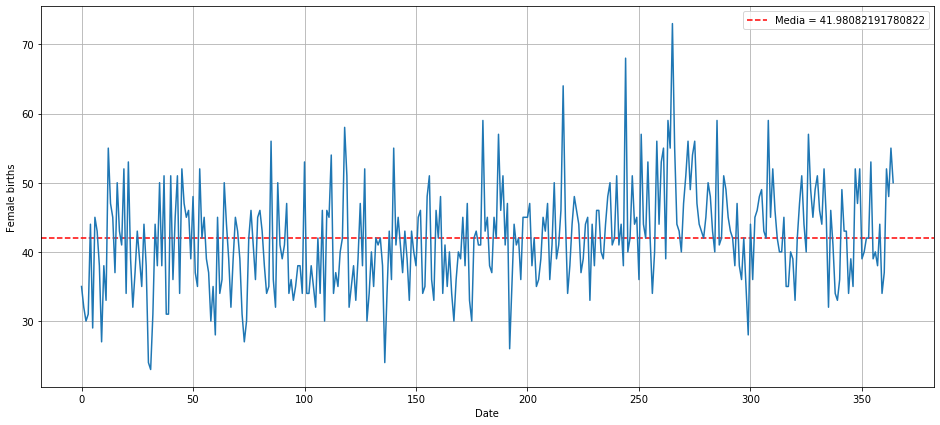

In [5]:
# Calculo del valor de la media de las observaciones
ej1_sta_mean = ej1_sta.values.mean()

# Tamaño del plot
pyplot.figure(figsize=(16, 7))

# Media estadistica
pyplot.axhline(ej1_sta_mean, linestyle='dashed', color='red', label='Media = {0}'.format(ej1_sta_mean))
pyplot.legend(loc='upper right')

# Label de los ejes
pyplot.xlabel('Date')
pyplot.ylabel('Female births')

pyplot.grid(True)
# pyplot.xticks(rotation=90)

## valores de la serie
pyplot.plot(range(0,len(ej1_sta)), ej1_sta.values)

Cuando una serie de tiempo es *Stationary* es más sencilla de modelar. Los métodos estadisticos de modelado asumen o requieren que la serie de tiempo sea *Stationary* para ser efectivos.

El gráfico anterior muestra un ejemplo de una serie *Stationary* donde se contabilizan los nacimientos diarios de mujeres durante un año, para ver mejor los resultados se agregó un rango en vez de imprimir directamente la fecha que lo hacía menos legible. Los registros del conjunto de datos van desde 1959-01-01 hasta 1959-12-31. con lo que se puede reemplazar por un rango de 365 días sin problema.

## y ¿Que pasa con las series de tiempo *Non-Stationary*?
En El punto anterior se aclaro que los métodos estadisticos de modelado de series temporal requiere o asume que las series es *Stationary* para ser más efectivos, entonces que ¿sucede cuando una serie es *Non-Stationary* ?

Las observaciones de una serie de tiempo *Non-Stationary* muetran efectos *Seasonal* tendencia y otras estructuras que dependen o varian con el tiempo.
Los estadísticos descriptivos como la media y la varianza cambian con el tiempo, causando que el  modelo no pueda definir los conceptos que desea capturar de manera correcta. Los métodos clasicos de predicción de series de tiempo se ocupan de convertir series de tiempo *Non-Stationary* en *Stationary* identificando y removiendo efectos de tendencia y *Seasonality*.

El siguiente ejemplo muestra una serie de tiempo *Non-stationary* que contiene información de los pasajeros de una aerolinea, en este ejemplo se muestran los dos efectos tendencia y *Seasonal*.

In [20]:
ej2_nonsta = read_csv('../../datasets/input/airline-passengers.csv', header=0, index_col=0)
print(ej2_nonsta.shape)
ej2_nonsta.head()

(144, 1)


,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [21]:
print('Fecha inicial: {}'.format(ej2_nonsta.index[0]))
print('Fecha Final: {}'.format(ej2_nonsta.index[-1]))

Fecha inicial: 1949-01
Fecha Final: 1960-12


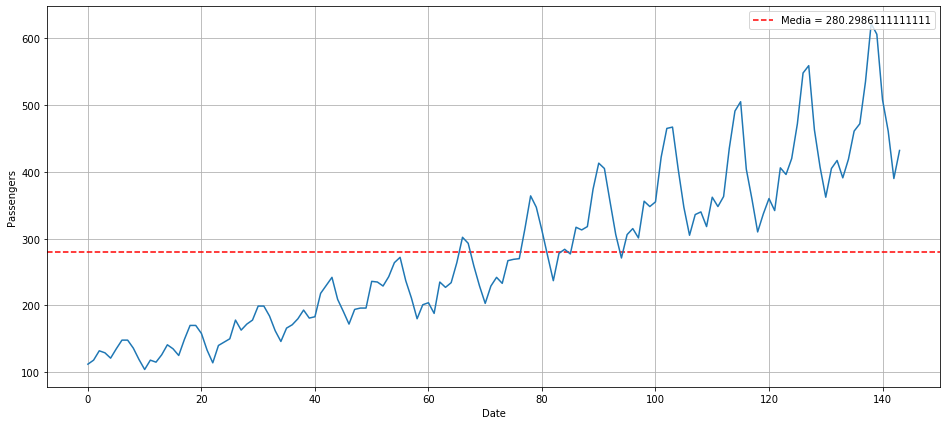

In [22]:
# Calculo del valor de la media de las observaciones
ej2_nonsta_mean = ej2_nonsta.values.mean()

# Tamaño del plot
pyplot.figure(figsize=(16, 7))

# Media estadistica
pyplot.axhline(ej2_nonsta_mean, linestyle='dashed', color='red', label='Media = {0}'.format(ej2_nonsta_mean))
pyplot.legend(loc='upper right')

# Label de los ejes
pyplot.xlabel('Date')
pyplot.ylabel('Passengers')

pyplot.grid(True)
#pyplot.xticks(rotation=90)

## valores de la serie
pyplot.plot(range(0,len(ej2_nonsta.index)), ej2_nonsta.values)

En el gráfico anterior se ve como la serie de datos tiene una tendencia a crecer y ademas las "formas" de la serie parecen repetirse en el tiempo (efecto *seasonal*), en esta caso la media de todos los valores se muestra fija en el gráfico.
Según el video [What is Stationarity](https://www.youtube.com/watch?v=aIdTGKjQWjA) de [Aric LaBarr](https://ariclabarr.com/) lo que se debe tener en cuenta es como varian los valores en diferentes ventanas de tiempo del mismo tamaño, es decir elegir diferentes ventanas de tiempo en la serie, calcular los estadisticos descriptivos y estos deberian mantenerse estables en el tiempo.

## Tipos de Stationary
La noción de **Stationary** viene del estudio teórico de las series de tiempo y es una noción muy útil para hacer predicciones.
Existen nociones más detalladas de **Stationary**:

* **Stationary process**: Un proceso que genera series de observaciones **Stationary**.
* **Stationary model**: Un modelo que describe una series de observaciones **Stationary**.
* **Trend stationary**: Una serie de tiempo que no muestra una tendencia.
* **Seasonal stationary**: Una serie de tiempo dque no muestra **Seasonality**.
* **Strictly stationary**: Definición matemática de un proceso **Stationary**, específicamente que la distribución conjunta de las observaciones es invariable al cambio de tiempo.

## Summary Statistics
Una manera rápida de validar si una serie de tiempo es **Stationary** que brinda un poco más de seguridad que el análisis de los gráficos es calculas las estadisticas descriptivas (Summary statistics), para esto se puede separar la serie en 2 o más grupos y comparar la media y la varianza de cada grupo, es decir crear ventanas de tiempo del mismo tamaño pero en diferentes momentos. Si la diferencia entre los valores calculados es estadísticamente significativa la serie de tiempo es **non-stationary**.

### Summary statistics for stationary series
Iniciamos analizando la serie que registra la cantidad de nacimientos diarios de mujeres.

(array([  6.,  22.,  71., 100.,  95.,  43.,  20.,   5.,   1.,   2.]),
 array([23., 28., 33., 38., 43., 48., 53., 58., 63., 68., 73.]),
 <a list of 10 Patch objects>)

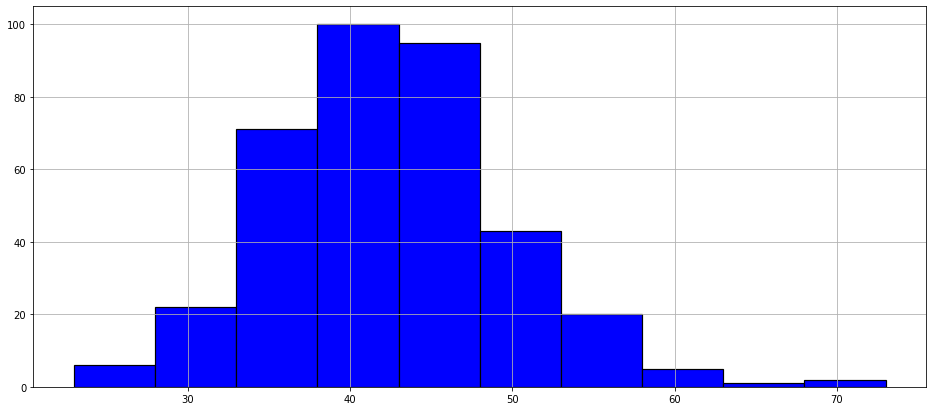

In [16]:
num_bins = 10

# Tamaño del plot
pyplot.figure(figsize=(16, 7))
pyplot.grid(True)
pyplot.hist(ej1_sta.values, num_bins, facecolor='blue', edgecolor='black', linewidth=1.2)
# pyplot.show()

En el histograma se puede ver la forma de la curva típica de una distribución Gausseana con una cola larga hacia la derecha.

In [50]:
def calc_summary_statistics(series, groups, lim_i = 0, lim_s = 100):
    X = series.values
    mean = []
    var = []
    split = round(len(X) / groups)
    
    print('Total observations: {}'.format(len(X)))
    print('Tamaño grupos: {}'.format(split))
    
    for splitidx in range(0,len(X),split):
        X_splited = X[splitidx:(splitidx + split)]
        mean.append(X_splited.mean())
        var.append(X_splited.var())
            
    print(mean)
    print(var)
    
    pyplot.figure(figsize=(16, 7))

    pyplot.grid(True)
    #pyplot.xticks(rotation=90)

    ## valores de la serie
    pyplot.plot(range(0,len(mean)), mean, label='Media')
    pyplot.plot(range(0,len(var)), var, label='Varianza')
    pyplot.legend(loc='upper right')
    
    # Label de los ejes
    pyplot.xlabel('Grupos')
    pyplot.ylabel('Valor')
    
    pyplot.ylim((lim_i,lim_s))
    
# mean1=39.763736, mean2=44.185792
#variance1=49.213410, variance2=48.708651


Total observations: 365
Tamaño grupos: 73
[39.73972602739726, 39.56164383561644, 41.42465753424658, 46.15068493150685, 43.02739726027397]
[56.02814787014448, 47.8352411334209, 42.29911803340214, 52.1553762431976, 41.259523362732224]


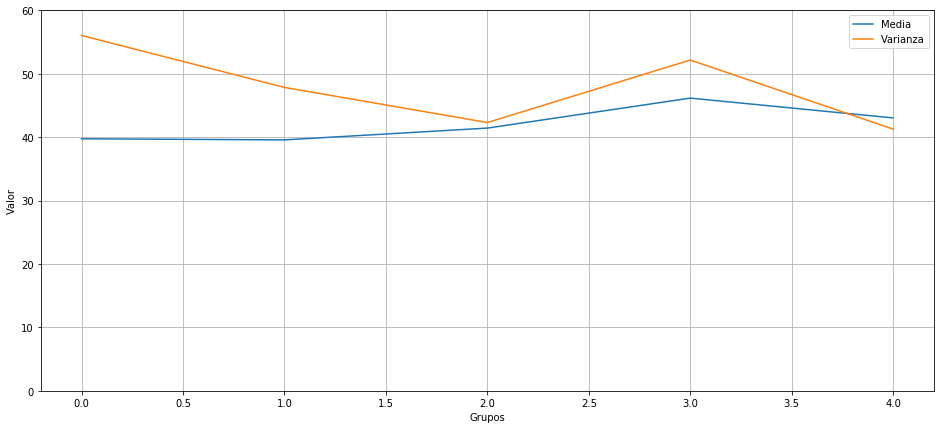

In [51]:
calc_summary_statistics(ej1_sta, 5, lim_s = 60)

El gráfico anterior muestra el comportamiento de las medidas de tendencia central (media y varianza) cambian poco en diferentes ventanas de tiempo del mismo tamaño. La funcion **calc_summary_statistics** crea ventanas del mismo tamaño en la serie de tiempo y calcula la media y la varianza, en el caso de las series **Stationary** el comportamiento que esperamos ver es que las diferencias entre los valores no sean muy grandes o estadisticamente significativas.

### Summary statistics for Non-stationary series
El mismo análisis aplicado sobre series de tiempo **non-Stationary** deberia comportarse diferente, a continuación se aplica la misma función al conjunto de datos de pasajeros de una aerolinea.

Total observations: 144
Tamaño grupos: 29
[138.06896551724137, 204.0344827586207, 259.7931034482759, 367.0344827586207, 438.0]
[386.8917954815696, 955.4815695600474, 2041.0606420927465, 3627.3436385255654, 6167.714285714285]


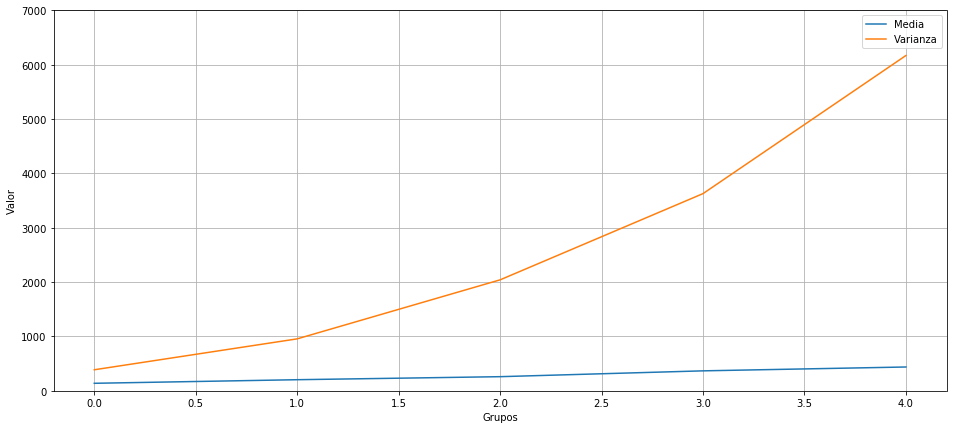

In [59]:
calc_summary_statistics(ej2_nonsta, 5, lim_s = 7000)

Total observations: 144
Tamaño grupos: 29
[138.06896551724137, 204.0344827586207, 259.7931034482759, 367.0344827586207, 438.0]
[386.8917954815696, 955.4815695600474, 2041.0606420927465, 3627.3436385255654, 6167.714285714285]


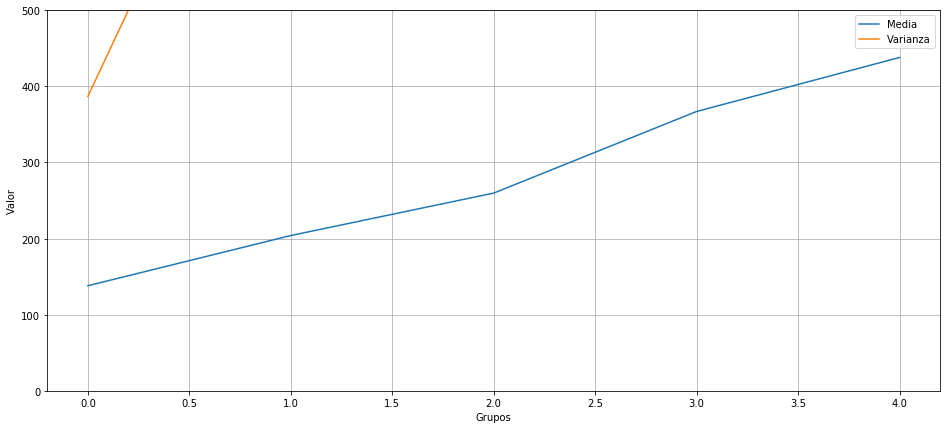

In [60]:
calc_summary_statistics(ej2_nonsta, 5, lim_s = 500)

Para este caso generé dos gráficos de los mismo datos pero con diferentes escalas, las diferencias entre la varianza y la media son muy grandes, sin embargo ambas muestran un aumento progresivo en cada grupo, es decir que tienen una clara *tendencia* a aumentar, lo cual resulta coherente con los datos. En este caso se pueda apreciar que la serie de tiempo sigue una marcada tendencia.

(array([24., 27., 19., 18., 22., 13., 10.,  6.,  3.,  2.]),
 array([104. , 155.8, 207.6, 259.4, 311.2, 363. , 414.8, 466.6, 518.4,
        570.2, 622. ]),
 <a list of 10 Patch objects>)

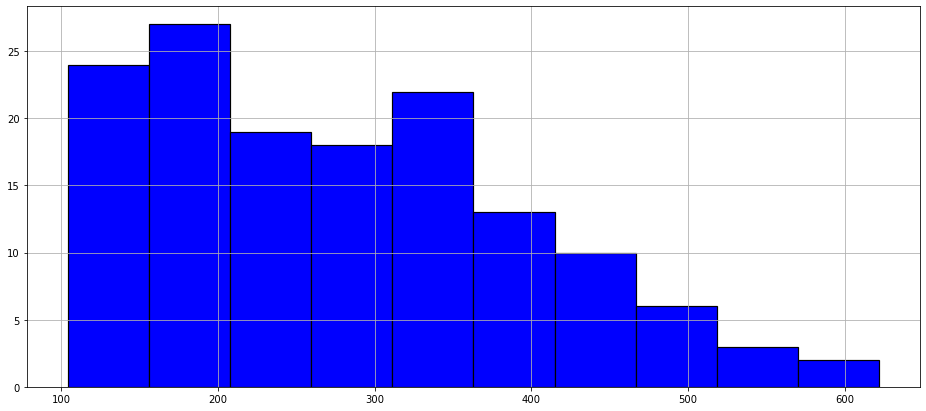

In [62]:
num_bins = 10

# Tamaño del plot
pyplot.figure(figsize=(16, 7))
pyplot.grid(True)
pyplot.hist(ej2_nonsta.values, num_bins, facecolor='blue', edgecolor='black', linewidth=1.2)

En el gráfico de la serie de tiempo se puede ver un componente de **seasonality** que va ceciendo con el tiempo. Esto puede sugerir un crecimiento exponencial temporada a temporada.
Se puede aplicar una transformación logaritmica para aplanar los cambios exponenciales y regresar a una relación lineal.

In [79]:
from numpy import log
from pandas import DataFrame

In [82]:
#X = ej2_nonsta.values
ej2_nonsta_log = DataFrame(data = log(ej2_nonsta.values), index = ej2_nonsta.index, columns=["Passengers"])
ej2_nonsta_log.head()

,Passengers
Month,
1949-01,4.718499
1949-02,4.770685
1949-03,4.882802
1949-04,4.859812
1949-05,4.795791


(array([ 8., 14., 11., 20., 16., 15., 27., 17., 11.,  5.]),
 array([4.6443909 , 4.82324582, 5.00210074, 5.18095566, 5.35981058,
        5.5386655 , 5.71752042, 5.89637533, 6.07523025, 6.25408517,
        6.43294009]),
 <a list of 10 Patch objects>)

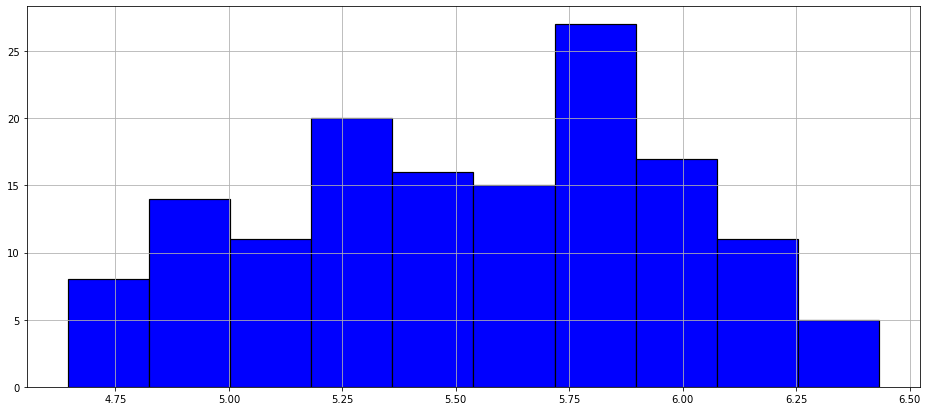

In [83]:
num_bins = 10

# Tamaño del plot
pyplot.figure(figsize=(16, 7))
pyplot.grid(True)
pyplot.hist(ej2_nonsta_log.values, num_bins, facecolor='blue', edgecolor='black', linewidth=1.2)

Después de aplicar la transformación logaritmica se puede ver una forma más familiar y próxima a una distribución Gaussiana o Uniforme.

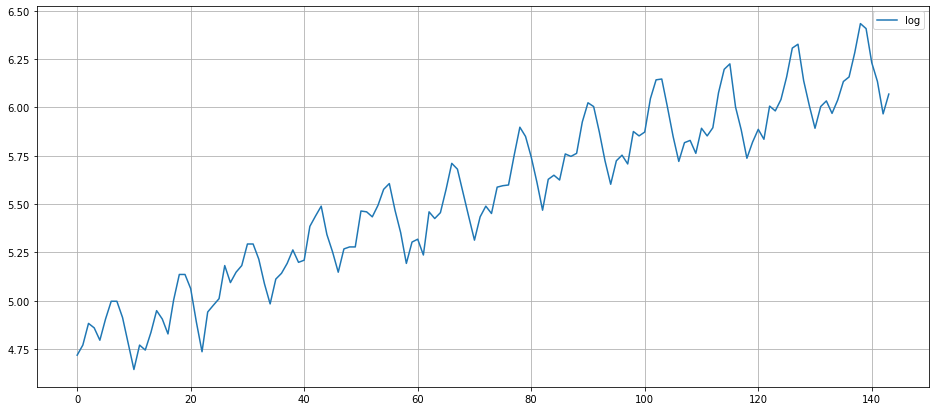

In [84]:
pyplot.figure(figsize=(16, 7))
pyplot.grid(True)
pyplot.plot(range(0,len(ej2_nonsta_log.values)), ej2_nonsta_log.values, label = 'log')
pyplot.legend(loc='upper right')
#pyplot.plot(range(0,len(ej2_nonsta.values)), ej2_nonsta.values, label = 'original')

En el gráfico de la serie temporal se puede ver una disminución en el crecimiento exponencial y un cambio de escala pero aún se pueden ver elementos de tendencia y **seasonality**, si calculamos de nuevo los valores de la media y la varianza obtenemos.

Total observations: 144
Tamaño grupos: 29
[4.917738948789245, 5.306944325013402, 5.544752505875035, 5.892666049480125, 6.06687089225047]
[0.019935975196120833, 0.022626480446162767, 0.030420910494029882, 0.024995048063282222, 0.030121936984388007]


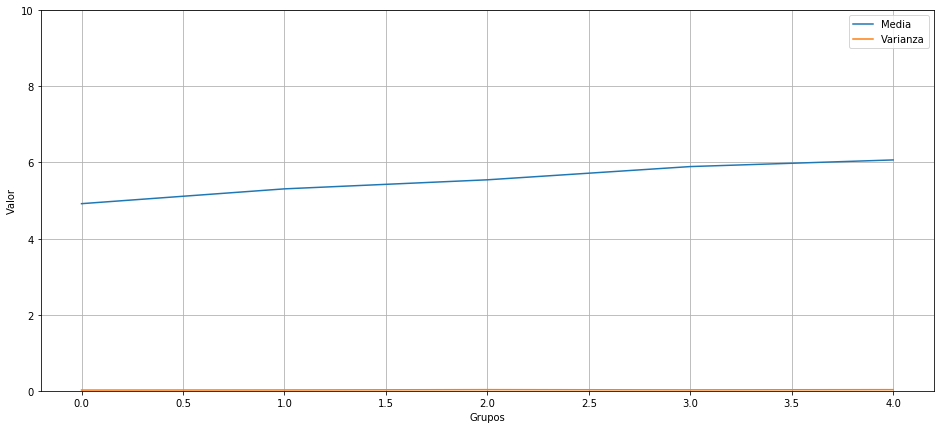

In [85]:
calc_summary_statistics(ej2_nonsta_log, 5, lim_s = 10)

En este caso se puede ver como los valores de la media y la varianza se estabilizan despues de aplicar la transformación logaritmica, la varianza sobre todo tuvo un cambio de escala muy evidente por lo que generé un gráfico adicional para ver los cambios con más detalle.

Total observations: 144
Tamaño grupos: 29
[4.917738948789245, 5.306944325013402, 5.544752505875035, 5.892666049480125, 6.06687089225047]
[0.019935975196120833, 0.022626480446162767, 0.030420910494029882, 0.024995048063282222, 0.030121936984388007]


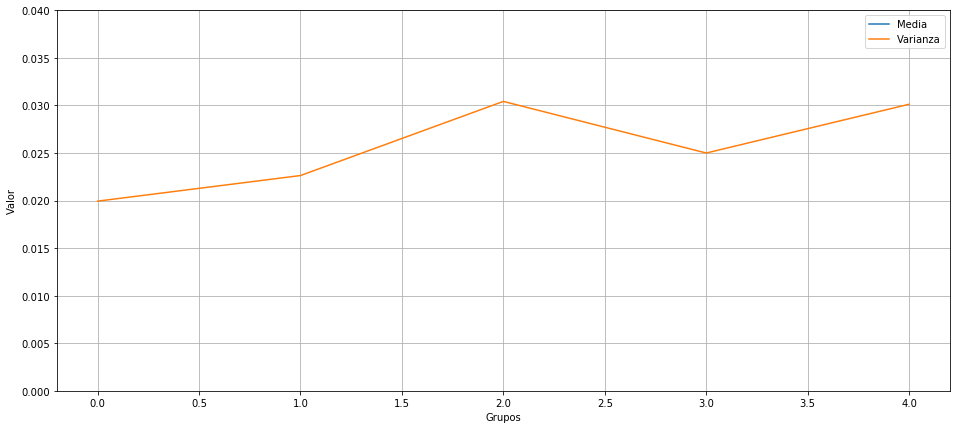

In [88]:
calc_summary_statistics(ej2_nonsta_log, 5, lim_s = 0.04)

Esto pude resultar confuso ya que despues de la transformación logaritmica la serie parece convertirse en **stationary** pero claramente todavia tiene los componentes de tendencia y **seasonality**, en algunos casos muy obvios es posible utilizar este método para determinar si una serie es **stationary** o no, pero para casos más complejos es necesario agregar un poco más de complejidad, para esto incluimos un test estadístico especicamente diseñado para determinar si una serie de tiempo es **stationary**.

## Augmented Dickey-Fuller test
Un test estadistico hace supuestos muy fuertes acerca de los datos. Estos test son utilizados solo para informar el grado con el cual una hipótesis nula puede ser rechazada o no. ***El resultado debe ser interpretado dependiendo del problema para que tenga un significado valioso.***
En todo caso brindan una prueba rapida y una evidencia de confirmación de que la serie de tiempo es **stationary** o no.

La intuision detras de el unit root test es qu este determina que tan fuerte esta definida una serie de tiempo por la tendencia.

Existe diferentes unit root test y *Augmented Dickey-Fuller* es uno de los más comúnmente utilizados. Este usa un modelo autoregresivo y optimiza el criterios de información a lo largo de multiples *lags *.

* La hipótesis nula del test es que la serie de tiempo puede ser representada por una *Raíz Unitaria* (Unit Root), la cual es **Non-Stationary** (Tiene una estructura que depende del tiempo). 

* La hipótesis alterna (rechaza la hipótesis nula) es que la serie es **Stationary**.

Los resultados se interpretan usando el *p-value* del test. Un p-value por debajo del umbral(Como 5% o 1%) sugiere que se rechaza la hipótesis nula, en caso contrario un p-value por arriba del umbral sugiere una falla en rechazar la hipótesis nula.

* **p-value > 0.05**: Falla al rechazar la hipótesis nula(H0), los datos tienen una raíz unitaria y la serie es **Non-Stationary**.

* **p-value <= 0.05**: Rechaza la hipótesis nula(H0), los datos no tienen una raíz unitaria y es la serie es **Stationary**.

A continuación aplico el test Augmented Dickey-Fuller a la serie de nacimientos de mujeres.

In [89]:
from statsmodels.tsa.stattools import adfuller

In [94]:
def adfuller_test(series):
    adf_result = adfuller(series.values)
    print('ADF Statistic: %f' % adf_result[0])
    print('p-value: %f' % adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))

    if adf_result[0] < adf_result[4]['5%']:
        print('Rejected H0 - Time Series is Stationary')
    else:
        print('Failed to reject H0 - Time Series is Non-Stationary')

In [95]:
adfuller_test(ej1_sta)

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
Rejected H0 - Time Series is Stationary


El valor estadístico del test es -4.808291, en este caso el valor estadístico es menor que el umbral del 1% (-3.449), lo cual es suficiente para rechazar la hipótesis nula(H0), por lo tanto la serie es **Stationary**. 

Adicionalmente el p-value es 0.000052, es decir por debajo de de 0.05, esto confirma el rechazo de la hipótesis nula(H0), con lo cual se puede afirmar que la serie de tiempo no tiene raices unitarias o no tiene estructuras que dependan del tiempo.

Si se ejecuta el mismo análisis sobre la serie de tiempo de pasajeros de la aerolinea.

In [97]:
adfuller_test(ej2_nonsta)

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Failed to reject H0 - Time Series is Non-Stationary


En este caso el valor estaditico del test es positivo y está por encima incluso del umbral 10%, lo cual muestra una falla al intentar rechazar la hipótesis nula(H0) con lo que se consideta que la serie es **Non-Stationary**.

Adicionalmente el p-value > 0.05 (0.991880 > 0.05), esto confirma la falla en el rechazo de H0 con lo que se considea que la serie de tiempo tiene raices unitarias o tiene estructuras que dependen del tiempo.

Durante el análisis anterior hicimos una transformación logaritmica para ver los fallos que puede tener el método de las medidas de distribución (media y varianza), a continuación probamos la misma serie transformada con el test ADF. 

In [98]:
adfuller_test(ej2_nonsta_log)

ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Failed to reject H0 - Time Series is Non-Stationary


En este caso el test señala que la serie es **Non-Stationary**, el valor estadístico del test ahora es más bajo(ADF Statistic: -1.717017) y está más cerca del umbral 10% pero sigue estando por arriba, el p-value: 0.422367 > 0.05 con lo que se considera que la serie tiene raices unitarias o estructuras que dependen del tiempo.

**TO DO's**
* ~Continuar con el tutorial hasta el final de **Summary Statistics.**~
* ~(Considerar) Según del video de [Aric LaBarr](https://www.youtube.com/watch?v=aIdTGKjQWjA) si tomo ventanas en diferentes momentos de la serie la media y la varianza deberian mantenerse estables (en algún intervalo de confianza). Validar esto haciendo un gráfico que pueda mostrar estos cambios.~
* Agregar ejemplos de otras series de tiempo que ya tengo identificadas como *Stationary* y *Non-Stationary*
* ~Hacer un gráfico que tome dos o más ventanas de tiempo del mismo tamaño y calcule los estadísticos descriptivos para comparar los cambios y graficar.~